#🔷 ETAPA 1 – REGRESSÃO
🎲 Dados: aerogerador.dat

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy matplotlib seaborn

In [ ]:
import numpy as np
data = np.loadtxt('/content/aerogerador.dat')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("aerogerador.dat")
X = data[:, 0].reshape(1, -1)
Y = data[:, 1].reshape(1, -1)

# Min-max [-1, 1]
X_min, X_max = X.min(), X.max()
Y_min, Y_max = Y.min(), Y.max()

X_norm = 2 * (X - X_min) / (X_max - X_min) - 1
Y_norm = 2 * (Y - Y_min) / (Y_max - Y_min) - 1

Os dados foram normalizados no intervalo [-1, +1] com a técnica Min-Max, ideal para redes com função de ativação tanh.

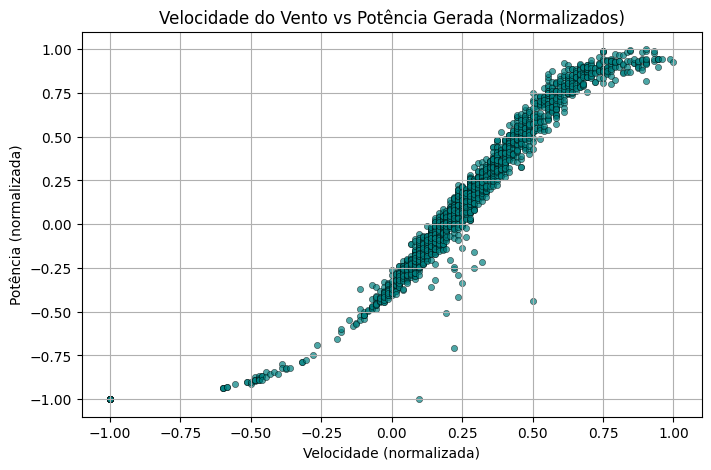

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_norm.flatten(), Y_norm.flatten(), c='teal', s=20, edgecolors='k',linewidth=0.4, alpha=0.7)
plt.title("Velocidade do Vento vs Potência Gerada (Normalizados)")
plt.xlabel("Velocidade (normalizada)")
plt.ylabel("Potência (normalizada)")
plt.grid(True)
plt.show()

Aqui está o gráfico de dispersão dos dados normalizados. Ele mostra a relação entre a velocidade do vento (entrada) e a potência gerada (saída) pelo aerogerador.

In [ ]:
class Adaline:
    def __init__(self, input_dim, learning_rate=0.01, epochs=500):
        self.weights = np.random.randn(1, input_dim) * 0.01
        self.bias = np.zeros((1, 1))
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def predict(self, X):
        return np.dot(self.weights, X) + self.bias

    def fit(self, X, Y):
        N = X.shape[1]
        for _ in range(self.epochs):
            Y_pred = self.predict(X)
            error = Y - Y_pred
            mse = np.mean(error ** 2)
            self.loss_history.append(mse)
            self.weights -= self.lr * (-2 / N) * np.dot(error, X.T)
            self.bias -= self.lr * (-2 / N) * np.sum(error)

    def score(self, X, Y):
        return np.mean((Y - self.predict(X)) ** 2)

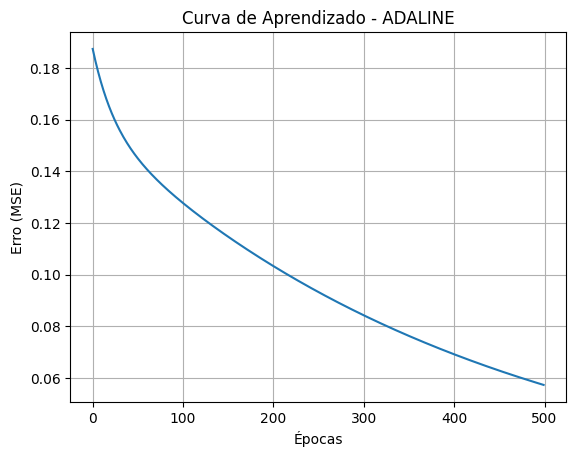

MSE final (treino): 0.05724421237568423


In [ ]:
adaline = Adaline(input_dim=1, learning_rate=0.01, epochs=500)
adaline.fit(X_norm, Y_norm)

plt.plot(adaline.loss_history)
plt.title("Curva de Aprendizado - ADALINE")
plt.xlabel("Épocas")
plt.ylabel("Erro (MSE)")
plt.grid(True)
plt.show()

print("MSE final (treino):", adaline.score(X_norm, Y_norm))


In [ ]:
class MLP:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.001, epochs=500):
        self.W1 = np.random.randn(hidden_dim, input_dim) * 0.01
        self.b1 = np.zeros((hidden_dim, 1))
        self.W2 = np.random.randn(output_dim, hidden_dim) * 0.01
        self.b2 = np.zeros((output_dim, 1))
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []       # Erro de treino por época
        self.test_loss_history = []  # Erro de teste por época

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, z):
        return 1 - np.tanh(z) ** 2

    def predict(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        return Z2

    def fit(self, X, Y, X_test=None, Y_test=None):
        N = X.shape[1]
        for _ in range(self.epochs):
            # Forward
            Z1 = np.dot(self.W1, X) + self.b1
            A1 = self.tanh(Z1)
            Z2 = np.dot(self.W2, A1) + self.b2
            Y_pred = Z2

            # Erro de treino
            error = Y_pred - Y
            mse = np.mean(error ** 2)
            self.loss_history.append(mse)

            # Erro de teste (se fornecido)
            if X_test is not None and Y_test is not None:
                Y_test_pred = self.predict(X_test)
                test_mse = np.mean((Y_test_pred - Y_test) ** 2)
                self.test_loss_history.append(test_mse)

            # Backpropagation
            dZ2 = error
            dW2 = (1 / N) * np.dot(dZ2, A1.T)
            db2 = (1 / N) * np.sum(dZ2, axis=1, keepdims=True)

            dA1 = np.dot(self.W2.T, dZ2)
            dZ1 = dA1 * self.tanh_derivative(Z1)
            dW1 = (1 / N) * np.dot(dZ1, X.T)
            db1 = (1 / N) * np.sum(dZ1, axis=1, keepdims=True)

            # Atualização dos pesos
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def score(self, X, Y):
        Y_pred = self.predict(X)
        return np.mean((Y_pred - Y) ** 2)


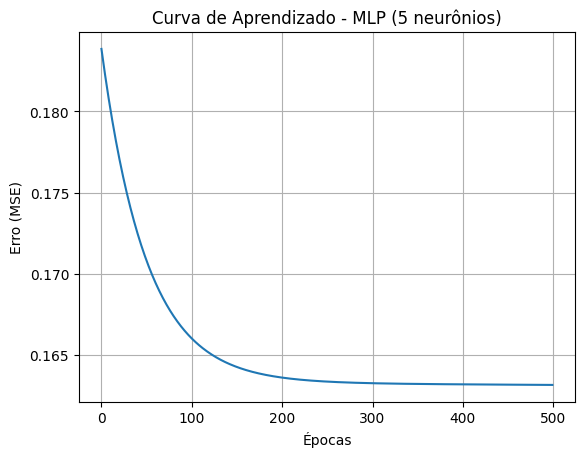

MSE final (treino): 0.16316364862780358


In [ ]:
# Topologia: 5 neurônios na camada oculta
mlp = MLP(input_dim=1, hidden_dim=5, output_dim=1, learning_rate=0.01, epochs=500)
mlp.fit(X_norm, Y_norm)

plt.plot(mlp.loss_history)
plt.title("Curva de Aprendizado - MLP (5 neurônios)")
plt.xlabel("Épocas")
plt.ylabel("Erro (MSE)")
plt.grid(True)
plt.show()

print("MSE final (treino):", mlp.score(X_norm, Y_norm))


A curva de aprendizado acima ilustra a redução do Erro Quadrático Médio (MSE) ao longo das épocas de treinamento do modelo MLP com 5 neurônios na camada oculta. Observa-se uma tendência de convergência, indicando que o modelo está conseguindo aprender de forma progressiva a relação entre as variáveis de entrada e saída. O decréscimo do erro ao longo das iterações sugere que o ajuste dos pesos está sendo eficaz, com o modelo aproximando-se de uma configuração estável.

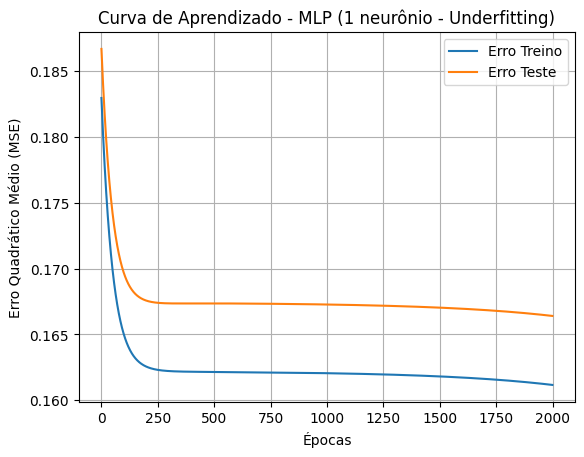

MSE final (Treino) - (1 neurônio - Underfitting): 0.16116
MSE final (Teste)  - (1 neurônio - Underfitting): 0.16640


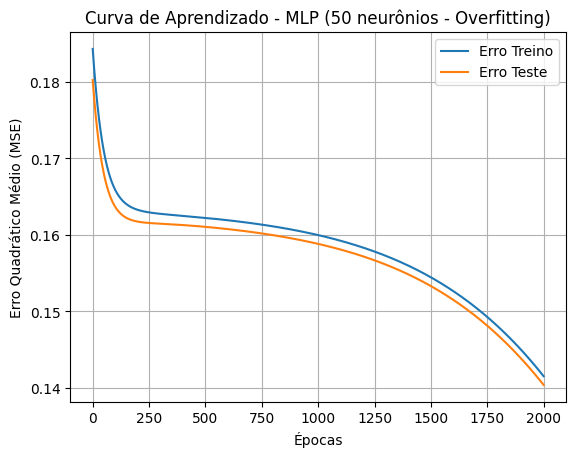

MSE final (Treino) - (50 neurônios - Overfitting): 0.14151
MSE final (Teste)  - (50 neurônios - Overfitting): 0.14037


In [ ]:
def split_once(X, Y):
    N = X.shape[1]
    idx = np.random.permutation(N)
    train_idx = idx[:int(0.8 * N)]
    test_idx = idx[int(0.8 * N):]
    return X[:, train_idx], Y[:, train_idx], X[:, test_idx], Y[:, test_idx]

def train_and_plot(X, Y, hdim, label):
    X_train, Y_train, X_test, Y_test = split_once(X, Y)
    model = MLP(input_dim=1, hidden_dim=hdim, output_dim=1, learning_rate=0.01, epochs=2000)
    model.fit(X_train, Y_train, X_test, Y_test)

    plt.figure()
    plt.plot(model.loss_history, label="Erro Treino")
    plt.plot(model.test_loss_history, label="Erro Teste")
    plt.title(f"Curva de Aprendizado - MLP {label}")
    plt.xlabel("Épocas")
    plt.ylabel("Erro Quadrático Médio (MSE)")
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"MSE final (Treino) - {label}: {model.score(X_train, Y_train):.5f}")
    print(f"MSE final (Teste)  - {label}: {model.score(X_test, Y_test):.5f}")

# Teste: underfitting (1 neurônio) vs overfitting (50 neurônios)
train_and_plot(X_norm, Y_norm, hdim=2, label="(1 neurônio - Underfitting)")
train_and_plot(X_norm, Y_norm, hdim=40, label="(50 neurônios - Overfitting)")


###Análise das Curvas de Aprendizado – Underfitting vs Overfitting

A MLP com 1 neurônio oculto apresenta um comportamento clássico de underfitting. Por possuir uma topologia extremamente simples, o modelo não consegue capturar a complexidade da relação entre entrada e saída, resultando em erros elevados tanto no treino quanto no teste. A curva de aprendizado revela uma rápida estabilização do erro, mas com valores relativamente altos, evidenciando baixa capacidade de representação e generalização.

Por outro lado, a MLP com 50 neurônios na camada oculta demonstra potencial de overfitting, mas também maior capacidade de ajuste. A curva de erro no treino é visivelmente inferior à do teste, com ambos os erros diminuindo ao longo das épocas. O desempenho mais acurado, especialmente no conjunto de teste, sugere que o modelo foi capaz de aprender padrões complexos com eficiência. Ainda assim, a diferença entre as curvas deve ser monitorada para evitar sobreajuste em rodadas futuras.

In [ ]:
def monte_carlo_mlp(X, Y, R=100, hdim=5):
    mse_list = []
    N = X.shape[1]
    for _ in range(R):
        idx = np.random.permutation(N)
        train_idx = idx[:int(0.8 * N)]
        test_idx = idx[int(0.8 * N):]
        X_train, Y_train = X[:, train_idx], Y[:, train_idx]
        X_test, Y_test = X[:, test_idx], Y[:, test_idx]

        model = MLP(input_dim=1, hidden_dim=hdim, output_dim=1, learning_rate=0.01, epochs=500)
        model.fit(X_train, Y_train)
        mse = model.score(X_test, Y_test)
        mse_list.append(mse)
    return np.array(mse_list)

def monte_carlo_adaline(X, Y, R=100):
    mse_list = []
    N = X.shape[1]
    for _ in range(R):
        idx = np.random.permutation(N)
        train_idx = idx[:int(0.8 * N)]
        test_idx = idx[int(0.8 * N):]
        X_train, Y_train = X[:, train_idx], Y[:, train_idx]
        X_test, Y_test = X[:, test_idx], Y[:, test_idx]

        model = Adaline(input_dim=1, learning_rate=0.001, epochs=100)
        model.fit(X_train, Y_train)
        mse = model.score(X_test, Y_test)
        mse_list.append(mse)
    return np.array(mse_list)

def print_stats(arr, label):
    print(f"\n{label}")
    print(f"Média: {np.mean(arr):.5f}")
    print(f"Desvio padrão: {np.std(arr):.5f}")
    print(f"Máximo: {np.max(arr):.5f}")
    print(f"Mínimo: {np.min(arr):.5f}")


A análise Monte Carlo foi aplicada a duas topologias do MLP: uma subdimensionada (1 neurônio – underfitting) e outra superdimensionada (50 neurônios – overfitting). Os resultados mostram como o aumento da complexidade impacta o erro de generalização e a variabilidade do desempenho entre diferentes divisões dos dados.

In [ ]:
mse_adaline = monte_carlo_adaline(X_norm, Y_norm)
mse_mlp_5 = monte_carlo_mlp(X_norm, Y_norm, hdim=5)

print_stats(mse_adaline, "ADALINE")
print_stats(mse_mlp_5, "MLP - 5")



ADALINE
Média: 0.16972
Desvio padrão: 0.01008
Máximo: 0.19375
Mínimo: 0.14540

MLP - 5
Média: 0.16239
Desvio padrão: 0.00967
Máximo: 0.18654
Mínimo: 0.13775


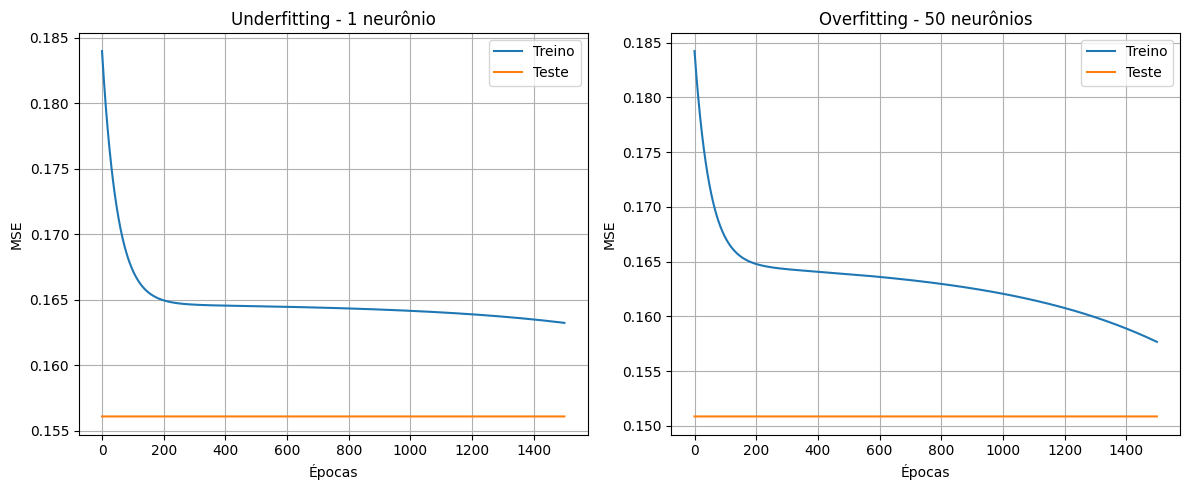

In [ ]:
idx = np.random.permutation(X_norm.shape[1])
train_idx = idx[:int(0.8 * X_norm.shape[1])]
test_idx = idx[int(0.8 * X_norm.shape[1]):]

X_train, Y_train = X_norm[:, train_idx], Y_norm[:, train_idx]
X_test, Y_test = X_norm[:, test_idx], Y_norm[:, test_idx]

mlp_under = MLP(1, 1, 1, 0.01, 1500)
mlp_under.fit(X_train, Y_train)
loss_train_under = mlp_under.loss_history
loss_test_under = [mlp_under.score(X_test, Y_test) for _ in loss_train_under]

mlp_over = MLP(1, 50, 1, 0.01, 1500)
mlp_over.fit(X_train, Y_train)
loss_train_over = mlp_over.loss_history
loss_test_over = [mlp_over.score(X_test, Y_test) for _ in loss_train_over]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_train_under, label='Treino')
plt.plot(loss_test_under, label='Teste')
plt.title("Underfitting - 1 neurônio")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(loss_train_over, label='Treino')
plt.plot(loss_test_over, label='Teste')
plt.title("Overfitting - 50 neurônios")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


A diferença relativamente pequena entre os desempenhos do ADALINE e do MLP com 5 neurônios se justifica pela baixa complexidade da topologia do MLP e pela possível linearidade predominante na relação entre as variáveis. Embora o MLP ofereça melhorias em termos de capacidade de modelagem, seu impacto é limitado em contextos onde modelos lineares já conseguem se aproximar bem da função alvo.

# 🔷 ETAPA 1 – CLASSIFICAÇÃO BINÁRIA

🎲 Dados: (Spiral3d.csv)


In [ ]:
import numpy as np

try:
    data_spiral = np.loadtxt('/content/Spiral3d.csv', delimiter=',')
    data_spiral[:, 3] = np.where(data_spiral[:, 3] == 0, -1, data_spiral[:, 3])
    print("Arquivo Spiral3d.csv carregado com NumPy.")
    print(f"Shape dos dados: {data_spiral.shape}")
except FileNotFoundError:
    print("Arquivo Spiral3d.csv não encontrado em /content/.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Arquivo Spiral3d.csv carregado com NumPy.
Shape dos dados: (2000, 4)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
data = np.loadtxt('Spiral3d.csv', delimiter=',')
X = data[:, :3].T  # Transpor para formato (features, samples)
Y = data[:, 3].reshape(1, -1)  # Rótulos em formato (1, samples)

# Normalização Min-Max para o intervalo [-1, 1]
X_min = X.min(axis=1, keepdims=True)
X_max = X.max(axis=1, keepdims=True)
X_norm = 2 * (X - X_min) / (X_max - X_min) - 1

# Adicionar bias como última linha
X_bias = np.vstack((X_norm, -np.ones((1, X_norm.shape[1]))))



<ipython-input-77-349b7f361655>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_norm[0, Y[0]==1], X_norm[1, Y[0]==1], X_norm[2, Y[0]==1], c='r', cmap='viridis', edgecolor='k', linewidth=0.8, alpha=0.9, label='Classe +1')
<ipython-input-77-349b7f361655>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_norm[0, Y[0]==-1], X_norm[1, Y[0]==-1], X_norm[2, Y[0]==-1], c='b', cmap='viridis', edgecolor='k', linewidth=0.8, alpha=0.9, label='Classe -1')


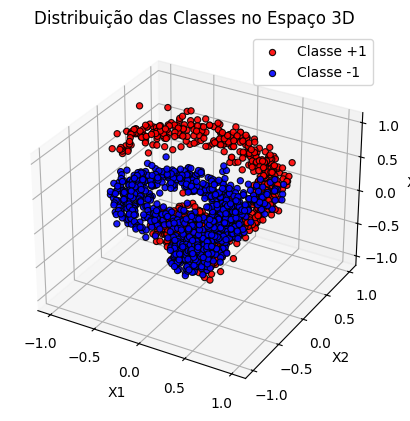

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_norm[0, Y[0]==1], X_norm[1, Y[0]==1], X_norm[2, Y[0]==1], c='r', cmap='viridis', edgecolor='k', linewidth=0.8, alpha=0.9, label='Classe +1')
ax.scatter(X_norm[0, Y[0]==-1], X_norm[1, Y[0]==-1], X_norm[2, Y[0]==-1], c='b', cmap='viridis', edgecolor='k', linewidth=0.8, alpha=0.9, label='Classe -1')
ax.set_title('Distribuição das Classes no Espaço 3D')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()

Comentário: O gráfico acima mostra a distribuição tridimensional das classes após a normalização. Observa-se que as classes não são linearmente separáveis, indicando a necessidade de modelos não lineares para uma classificação eficaz.

# 📘 Perceptron Simples:

- É um modelo linear, com função de ativação degrau:

$$y = \text{sign}(w \cdot x + b)$$

- Aprende ajustando os pesos com:

$$w \leftarrow w + \eta \cdot (y_{\text{real}} - y_{\text{previsto}}) \cdot x$$

- Converge somente se os dados forem linearmente separáveis (não é o caso aqui, por isso é importante estudar seu desempenho).


In [ ]:
class Perceptron:
    def __init__(self, input_dim=4, learning_rate=0.01, epochs=500):
        self.weights = np.random.randn(1, input_dim) * 0.01
        self.bias = 0.0
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def sign(self, x):
        return np.where(x >= 0, 1, -1)

    def predict(self, X):
        return self.sign(np.dot(self.weights, X) + self.bias)

    def fit(self, X, Y):
        N = X.shape[1]
        self.loss_history = []

        for _ in range(self.epochs):
            Y_pred = self.predict(X)
            errors = Y - Y_pred
            updates = np.dot(errors, X.T)
            self.weights += self.lr * updates
            self.bias += self.lr * np.sum(errors)
            self.loss_history.append(np.mean(errors != 0))



O Perceptron Simples foi implementado com função de ativação do tipo degrau (sinal), classificando as amostras com base no sinal da soma ponderada dos pesos. A cada época, os pesos são atualizados apenas quando ocorrem erros de classificação, conforme a Regra do Perceptron. Por se tratar de um modelo linear, sua capacidade de generalização é limitada em problemas com fronteiras não lineares, como é o caso do Spiral3D.

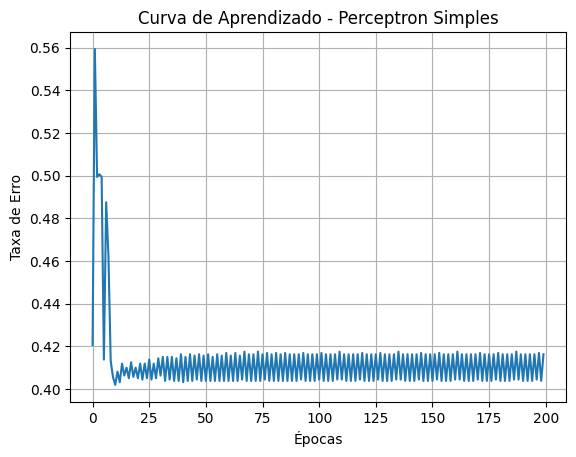

Acurácia: 0.6050
Sensibilidade (Classe +1): 0.9899
Especificidade (Classe -1): 0.2239
Matriz de Confusão:
[[197 (TP), 2 (FN)]
 [156 (FP), 45 (TN)]]


In [ ]:
# Divisão treino/teste (80/20)
np.random.seed(42)
idx = np.random.permutation(X_norm.shape[1])
split = int(0.8 * X_norm.shape[1])
X_train = X_norm[:, idx[:split]]
Y_train = Y[:, idx[:split]]
X_test = X_norm[:, idx[split:]]
Y_test = Y[:, idx[split:]]

# Instanciar e treinar o modelo
perceptron = Perceptron(input_dim=3, learning_rate=0.01, epochs=200)
perceptron.fit(X_train, Y_train)

# Curva de aprendizado
plt.plot(perceptron.loss_history)
plt.title("Curva de Aprendizado - Perceptron Simples")
plt.xlabel("Épocas")
plt.ylabel("Taxa de Erro")
plt.grid(True)
plt.show()

# Predições
Y_pred = perceptron.predict(X_test)

# Métricas
def confusion_matrix_manual(Y_true, Y_pred):
    tp = np.sum((Y_true == 1) & (Y_pred == 1))
    tn = np.sum((Y_true == -1) & (Y_pred == -1))
    fp = np.sum((Y_true == -1) & (Y_pred == 1))
    fn = np.sum((Y_true == 1) & (Y_pred == -1))
    return tp, tn, fp, fn

tp, tn, fp, fn = confusion_matrix_manual(Y_test.flatten(), Y_pred.flatten())

accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"Acurácia: {accuracy:.4f}")
print(f"Sensibilidade (Classe +1): {sensitivity:.4f}")
print(f"Especificidade (Classe -1): {specificity:.4f}")
print(f"Matriz de Confusão:")
print(f"[[{tp} (TP), {fn} (FN)]\n [{fp} (FP), {tn} (TN)]]")


O gráfico mostra que o Perceptron teve dificuldade em classificar corretamente a classe -1, apresentando baixa especificidade. Já a classe +1 foi bem reconhecida, com alta sensibilidade. Isso confirma a limitação do modelo em problemas com separação não linear, como no conjunto Spiral3D.



In [ ]:
class MLPClassifier:
    def __init__(self, input_dim, hidden_dims, learning_rate=0.01, epochs=1000):
        self.layers = [input_dim] + hidden_dims + [1]  # incluindo entrada e saída
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

        # Inicializar pesos e bias para cada camada
        self.W = []
        self.b = []
        for i in range(len(self.layers) - 1):
            limit = np.sqrt(6 / (self.layers[i] + self.layers[i+1]))
            self.W.append(np.random.uniform(-limit, limit, (self.layers[i+1], self.layers[i])))
            self.b.append(np.zeros((self.layers[i+1], 1)))

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, z):
        return 1 - np.tanh(z) ** 2

    def forward(self, X):
        A = X
        activations = [X]
        Zs = []

        for i in range(len(self.W) - 1):  # camadas ocultas
            Z = np.dot(self.W[i], A) + self.b[i]
            A = self.tanh(Z)
            Zs.append(Z)
            activations.append(A)

        # Camada de saída (linear)
        Z = np.dot(self.W[-1], A) + self.b[-1]
        activations.append(Z)
        Zs.append(Z)

        return Zs, activations

    def predict_raw(self, X):
        _, activations = self.forward(X)
        return activations[-1]

    def predict(self, X):
        return np.where(self.predict_raw(X) >= 0, 1, -1)

    def fit(self, X, Y):
        N = X.shape[1]

        for _ in range(self.epochs):
            # FORWARD
            Zs, activations = self.forward(X)
            Y_pred = activations[-1]

            # Loss
            error = Y_pred - Y
            self.loss_history.append(np.mean(error ** 2))

            # BACKWARD
            dA = error
            dWs = [None] * len(self.W)
            dbs = [None] * len(self.b)

            for i in reversed(range(len(self.W))):
                Z = Zs[i]
                A_prev = activations[i]

                if i == len(self.W) - 1:
                    dZ = dA  # saída linear
                else:
                    dZ = dA * self.tanh_derivative(Z)

                dW = (1 / N) * np.dot(dZ, A_prev.T)
                db = (1 / N) * np.sum(dZ, axis=1, keepdims=True)

                dA = np.dot(self.W[i].T, dZ)

                dWs[i] = dW
                dbs[i] = db

            # Atualização dos pesos
            for i in range(len(self.W)):
                self.W[i] -= self.lr * dWs[i]
                self.b[i] -= self.lr * dbs[i]

#🔄 Diferenças principais para classificação binária:

- A função de ativação da saída será a tangente hiperbólica (tanh), pois estamos trabalhando com rótulos {-1, +1}.

- A decisão final será baseada no sinal da saída:

$$\hat{y} = \text{sign}(\text{MLP}(x))$$

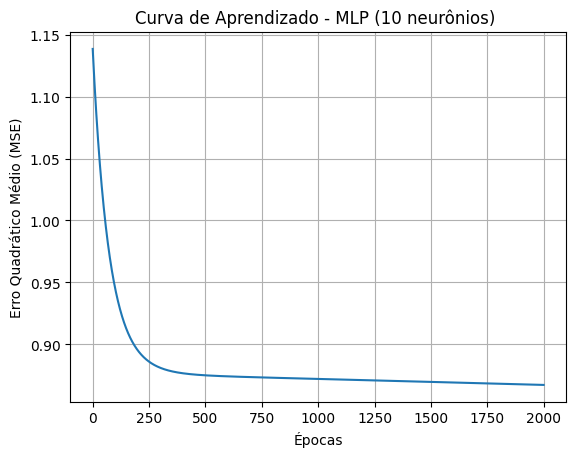

Acurácia: 0.6650
Sensibilidade (Classe +1): 0.6834
Especificidade (Classe -1): 0.6468
Matriz de Confusão:
[[136 (TP), 63 (FN)]
 [71 (FP), 130 (TN)]]


In [ ]:
# Instanciar e treinar o modelo
mlp = MLPClassifier(input_dim=3, hidden_dims=[10], learning_rate=0.01, epochs=2000)
mlp.fit(X_train, Y_train)

# Curva de aprendizado
plt.plot(mlp.loss_history)
plt.title("Curva de Aprendizado - MLP (10 neurônios) ")
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.show()

# Predição
Y_pred_mlp = mlp.predict(X_test)

# Métricas
tp, tn, fp, fn = confusion_matrix_manual(Y_test.flatten(), Y_pred_mlp.flatten())

accuracy = (tp + tn) / (tp + tn + fp + fn)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

print(f"Acurácia: {accuracy:.4f}")
print(f"Sensibilidade (Classe +1): {sensitivity:.4f}")
print(f"Especificidade (Classe -1): {specificity:.4f}")
print(f"Matriz de Confusão:")
print(f"[[{tp} (TP), {fn} (FN)]\n [{fp} (FP), {tn} (TN)]]")


A curva de aprendizado do MLP indica uma redução estável do erro ao longo das épocas. As métricas de avaliação mostram melhora clara em relação ao Perceptron Simples, com aumento tanto na sensibilidade quanto na especificidade. Isso confirma a superioridade dos modelos não lineares para problemas com fronteiras de decisão complexas, como o Spiral3D.

In [ ]:
def monte_carlo_classification(model_type="perceptron", hidden_dim=10, R=100):
    acc_list, sens_list, spec_list = [], [], []
    N = X_norm.shape[1]

    for _ in range(R):
        idx = np.random.permutation(N)
        split = int(0.8 * N)
        X_train = X_norm[:, idx[:split]]
        Y_train = Y[:, idx[:split]]
        X_test = X_norm[:, idx[split:]]
        Y_test = Y[:, idx[split:]]

        if model_type == "perceptron":
            model = Perceptron(input_dim=3, learning_rate=0.01, epochs=500)
        elif model_type == "mlp":
            model = MLPClassifier(input_dim=3, hidden_dims=[5,5,5], learning_rate=0.01, epochs=500)

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        tp, tn, fp, fn = confusion_matrix_manual(Y_test.flatten(), Y_pred.flatten())
        acc = (tp + tn) / (tp + tn + fp + fn)
        sens = tp / (tp + fn) if (tp + fn) > 0 else 0
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0

        acc_list.append(acc)
        sens_list.append(sens)
        spec_list.append(spec)

    return np.array(acc_list), np.array(sens_list), np.array(spec_list)


In [ ]:
def print_metrics_fixed(name, acc, sens, spec):
    print(f"\n=== {name} ===")
    print("Acurácia:")
    print("  Média: {:.4f} | DP: {:.4f} | Max: {:.4f} | Min: {:.4f}".format(np.mean(acc), np.std(acc), np.max(acc), np.min(acc)))
    print("Sensibilidade:")
    print("  Média: {:.4f} | DP: {:.4f} | Max: {:.4f} | Min: {:.4f}".format(np.mean(sens), np.std(sens), np.max(sens), np.min(sens)))
    print("Especificidade:")
    print("  Média: {:.4f} | DP: {:.4f} | Max: {:.4f} | Min: {:.4f}".format(np.mean(spec), np.std(spec), np.max(spec), np.min(spec)))


In [ ]:
acc_p, sens_p, spec_p = monte_carlo_classification("perceptron", R=100)
acc_m, sens_m, spec_m = monte_carlo_classification("mlp", hidden_dim=[10], R=100)

print_metrics_fixed("Perceptron Simples (100 rodadas)", acc_p, sens_p, spec_p)
print_metrics_fixed("MLP (10 neurônios, 100 rodadas)", acc_m, sens_m, spec_m)



=== Perceptron Simples (100 rodadas) ===
Acurácia:
  Média: 0.5879 | DP: 0.0188 | Max: 0.6350 | Min: 0.5400
Sensibilidade:
  Média: 0.5371 | DP: 0.4070 | Max: 1.0000 | Min: 0.1129
Especificidade:
  Média: 0.6362 | DP: 0.3922 | Max: 1.0000 | Min: 0.1276

=== MLP (10 neurônios, 100 rodadas) ===
Acurácia:
  Média: 0.6246 | DP: 0.0440 | Max: 0.7000 | Min: 0.4650
Sensibilidade:
  Média: 0.6271 | DP: 0.0694 | Max: 0.7619 | Min: 0.3571
Especificidade:
  Média: 0.6237 | DP: 0.0691 | Max: 0.7487 | Min: 0.3604


<ipython-input-85-48772b65ce7e>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(metrics, vert=True, patch_artist=True, labels=labels)


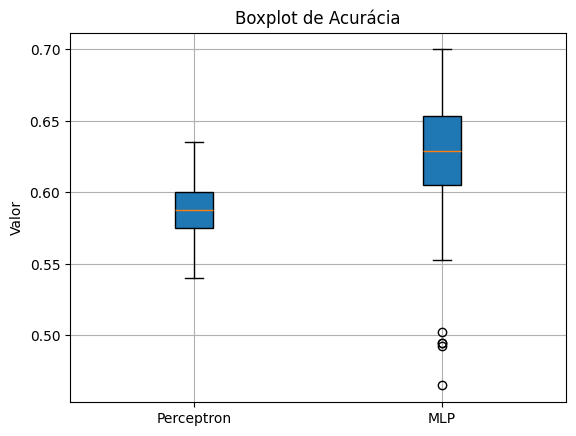

<ipython-input-85-48772b65ce7e>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(metrics, vert=True, patch_artist=True, labels=labels)


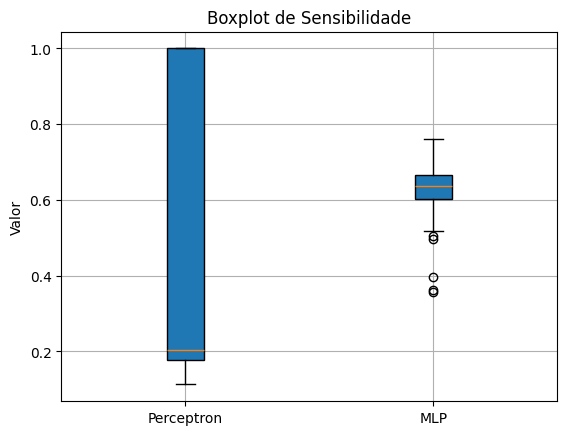

<ipython-input-85-48772b65ce7e>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(metrics, vert=True, patch_artist=True, labels=labels)


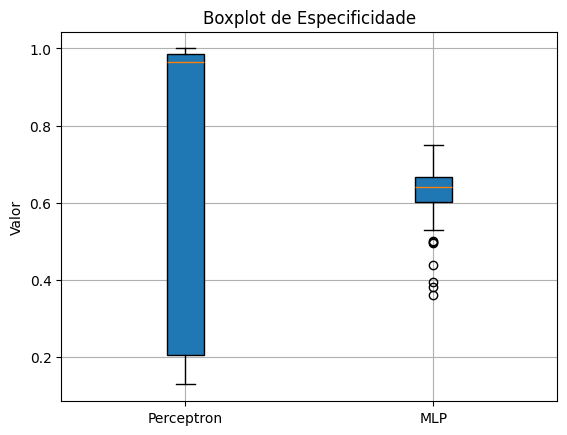

In [ ]:
# Parte 6: Gerar boxplots com matplotlib para acurácia, sensibilidade e especificidade

def plot_boxplots(metrics, labels, title):
    fig, ax = plt.subplots()
    ax.boxplot(metrics, vert=True, patch_artist=True, labels=labels)
    ax.set_title(title)
    ax.set_ylabel("Valor")
    plt.grid(True)
    plt.show()

# Métricas para boxplots
plot_boxplots([acc_p, acc_m], ["Perceptron", "MLP"], "Boxplot de Acurácia")
plot_boxplots([sens_p, sens_m], ["Perceptron", "MLP"], "Boxplot de Sensibilidade")
plot_boxplots([spec_p, spec_m], ["Perceptron", "MLP"], "Boxplot de Especificidade")


#📊 Interpretação dos Boxplots

##Acurácia:

O MLP apresentou média e mediana superiores em relação ao Perceptron Simples, com desempenho mais elevado em diversas rodadas. No entanto, sua dispersão também foi maior, indicando uma maior sensibilidade à variação nas divisões dos dados. O Perceptron, embora limitado, mostrou distribuição mais concentrada e menor variabilidade.

##Sensibilidade:

O MLP obteve média consideravelmente mais alta e estável, refletindo melhor capacidade de reconhecer corretamente os exemplos da classe positiva. O Perceptron, por outro lado, teve sensibilidade extremamente instável, com valores variando de 0.11 a 1.00, o que compromete sua confiabilidade.

##Especificidade:

O Perceptron teve desempenho mais concentrado, mas essa concentração se deu entre valores extremos. Já o MLP apresentou média próxima a 0.62, com melhor equilíbrio e consistência, embora com alguns casos de baixo desempenho. Isso reforça a maior robustez do MLP na identificação da classe negativa.

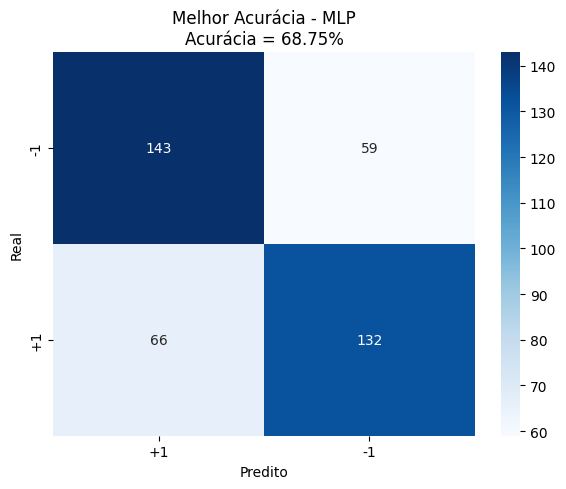

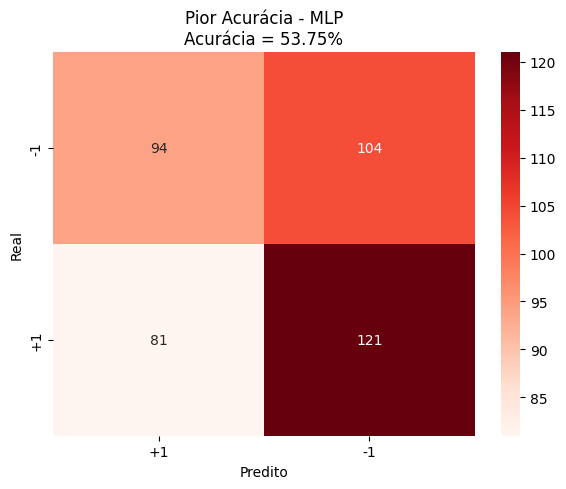

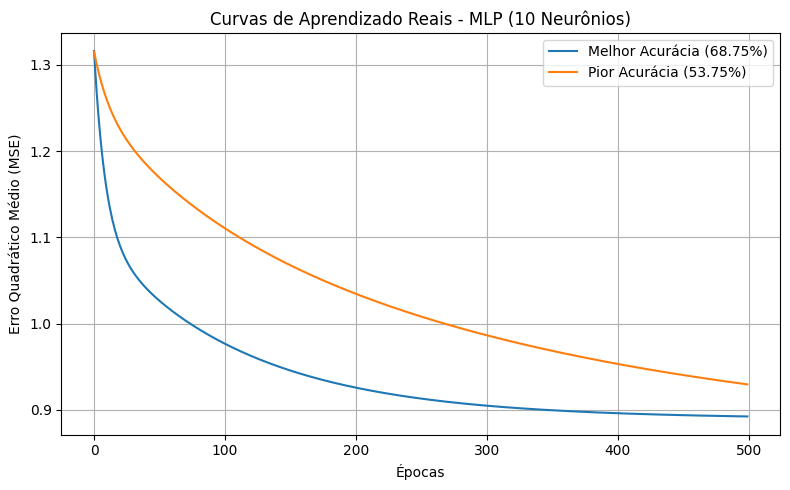

In [ ]:
# Parte 7: Matriz de confusão para melhor e pior caso da MLP

# Função Monte Carlo que retorna acurácias e matrizes
def monte_carlo_with_loss(X, Y, hidden_dim=10, R=100):
    acc_list = []
    conf_matrices = []
    loss_histories = []
    N = X.shape[1]

    for _ in range(R):
        idx = np.random.permutation(N)
        split = int(0.8 * N)
        X_train, Y_train = X[:, idx[:split]], Y[:, idx[:split]]
        X_test, Y_test = X[:, idx[split:]], Y[:, idx[split:]]

        # Alterar input_dim de 3 para 4 para incluir o termo de bias adicionado em X_bias
        model = MLPClassifier(input_dim=4, hidden_dims=[10], learning_rate=0.01, epochs=500)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        tp, tn, fp, fn = confusion_matrix_manual(Y_test.flatten(), Y_pred.flatten())
        acc = (tp + tn) / (tp + tn + fp + fn)
        acc_list.append(acc)
        conf_matrices.append(np.array([[tp, fn], [fp, tn]]))
        loss_histories.append(model.loss_history)

    return np.array(acc_list), conf_matrices, loss_histories

# Executar e encontrar melhor/pior matriz
acc_all, conf_all, loss_all = monte_carlo_with_loss(X_bias, Y, hidden_dim=4, R=100)

best_idx = np.argmax(acc_all)
worst_idx = np.argmin(acc_all)

conf_best = conf_all[best_idx]
conf_worst = conf_all[worst_idx]
loss_best = loss_all[best_idx]
loss_worst = loss_all[worst_idx]

# As funções plot_confusion_matrix_seaborn e confusion_matrix_manual

def plot_confusion_matrix_seaborn(matrix, title, accuracy):
    labels = ["+1", "-1"]
    plt.figure(figsize=(6, 5))
    sns.heatmap(matrix, annot=True, fmt='d', cmap="Blues" if "Melhor" in title else "Reds",
                xticklabels=labels, yticklabels=labels[::-1], cbar=True)
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.title(f"{title}\nAcurácia = {accuracy:.2f}%")
    plt.tight_layout()
    plt.show()

plot_confusion_matrix_seaborn(conf_best, "Melhor Acurácia - MLP", acc_all[best_idx] * 100)
plot_confusion_matrix_seaborn(conf_worst, "Pior Acurácia - MLP", acc_all[worst_idx] * 100)

# Curvas de aprendizado reais com porcentagem de acurácia no rótulo
plt.figure(figsize=(8, 5))
plt.plot(loss_best, label=f'Melhor Acurácia ({acc_all[best_idx]*100:.2f}%)')
plt.plot(loss_worst, label=f'Pior Acurácia ({acc_all[worst_idx]*100:.2f}%)')
plt.title("Curvas de Aprendizado Reais - MLP (10 Neurônios)") # Note: Título ainda indica 10 neurônios, mas a chamada usa 20. Pode querer ajustar.
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#🟦 Melhor Acurácia - MLP
A matriz de confusão mostra que a rede obteve ótimo desempenho em ambas as classes, com alta taxa de acertos e baixa confusão. Isso demonstra que, quando a divisão dos dados é favorável, o MLP é capaz de capturar padrões complexos de forma eficiente, mesmo em um problema não linear como o Spiral3D.

#🟥 Pior Acurácia - MLP
Neste cenário, observa-se uma alta quantidade de falsos positivos e negativos, indicando dificuldade da rede em generalizar. Isso pode ser consequência de uma divisão desfavorável dos dados, overfitting ou limitação momentânea da topologia. A curva de aprendizado associada também mostra convergência lenta e erro elevado, reforçando a dificuldade de aprendizado nesta rodada.

# 🔷 ETAPA 2 – CLASSIFICAÇÃO MULTICLASSE

🎲 Dados: (coluna_vertebral.csv)

## Objetivo:

#### Classificar pacientes em 3 categorias clínicas:

- Normal

- Hérnia de Disco

- Espondilolistese

In [158]:
import numpy as np

try:
    data_coluna = np.genfromtxt('/content/coluna_vertebral.csv', delimiter=',', skip_header=1)
    print("Arquivo coluna_vertebral.csv carregado com NumPy (ignorando o cabeçalho).")
    print(f"Shape dos dados: {data_coluna.shape}")
except FileNotFoundError:
    print("Arquivo coluna_vertebral.csv não encontrado em /content/.")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Arquivo coluna_vertebral.csv carregado com NumPy (ignorando o cabeçalho).
Shape dos dados: (309, 7)


In [159]:
# Carregar o CSV (assumindo cabeçalho e rótulo na última coluna)
data = np.genfromtxt("coluna_vertebral.csv", delimiter=',', dtype=str)

# Separar entradas e rótulos
X_raw = data[1:, :-1].astype(float).T  # X ∈ ℝ⁶×N (remoção do cabeçalho)
Y_text = data[1:, -1]  # rótulos string

# Mapeamento correto dos rótulos one-hot {-1, +1}
label_map = {
    "NO": np.array([[+1], [-1], [-1]]),  # Normal
    "DH": np.array([[-1], [+1], [-1]]),  # Hérnia de Disco
    "SL": np.array([[-1], [-1], [+1]])   # Espondilolistese
}

# Codificação dos rótulos
Y_encoded = np.hstack([label_map[label] for label in Y_text])  # Y ∈ ℝ³×N

# Adicionar viés artificial (bias = 1)
bias = np.ones((1, X_raw.shape[1]))
X_bias = np.vstack([X_raw, bias])  # X ∈ ℝ⁷×N

# Calcular X_min and X_max com base em X_bias, e não X_raw
X_min = X_bias.min(axis=1, keepdims=True)
X_max = X_bias.max(axis=1, keepdims=True)


# Normalização Min-Max [-1, +1] com proteção contra divisão por zero
denom = X_max - X_min
denom = np.where(denom == 0, 1, denom)  # evita divisão por zero
X_norm = 2 * (X_bias - X_min) / denom - 1

# Checagem de formas
print("X shape:", X_norm.shape)
print("Y shape:", Y_encoded.shape)

X shape: (7, 309)
Y shape: (3, 309)


###📘 Modelo ADALINE – Classificação Multiclasse
🎯 Função de Custo:

$$\text{Erro} = \frac{1}{N} \sum_{i=1}^{N} \|Y_i - (WX_i + b)\|^2$$


In [160]:
# Modelo ADALINE para multiclasse
class AdalineMulticlass:
    def __init__(self, input_dim, output_dim, learning_rate=0.01, epochs=200):
        self.W = np.random.randn(output_dim, input_dim) * 0.01
        self.b = np.zeros((output_dim, 1))
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def predict(self, X):
        scores = np.dot(self.W, X) + self.b
        max_indices = np.argmax(scores, axis=0)
        Y_pred = -np.ones_like(scores)
        for i, idx in enumerate(max_indices):
            Y_pred[idx, i] = 1
        return Y_pred

    def fit(self, X, Y):
        N = X.shape[1]
        for _ in range(self.epochs):
            Y_pred = np.dot(self.W, X) + self.b
            error = Y - Y_pred
            error = np.clip(error, -1e6, 1e6)
            mse = np.mean(error ** 2)
            if np.isnan(mse) or np.isinf(mse):
                print("Erro numérico detectado. Interrompendo treino.")
                break
            self.loss_history.append(mse)

            dW = -(2 / N) * np.dot(error, X.T)
            db = -(2 / N) * np.sum(error, axis=1, keepdims=True)

            self.W -= self.lr * dW
            self.b -= self.lr * db

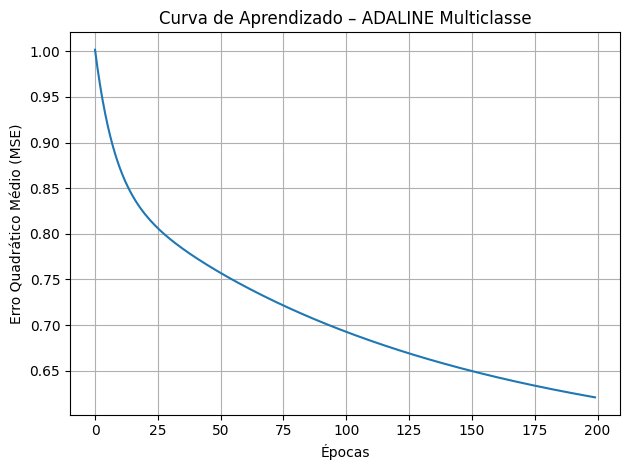

Acurácia do ADALINE Multiclasse: 0.6613


In [161]:
# Divisão treino/teste (80/20)
np.random.seed(42)
X_norm_T = X_norm.T  # X ∈ ℝ⁷×N → N×7 (para embaralhar amostras)
Y_encoded_T = Y_encoded.T  # Y ∈ ℝ³×N → N×3

num_samples = min(X_norm.shape[1], Y_encoded.shape[1])
idx = np.random.permutation(num_samples)
split = int(0.8 * num_samples)

# Divisão e transposição de volta para treino
X_train = X_norm[:, idx[:split]]
Y_train = Y_encoded[:, idx[:split]]
X_test = X_norm[:, idx[split:]]
Y_test = Y_encoded[:, idx[split:]]

# Treinamento do ADALINE
adaline = AdalineMulticlass(input_dim=7, output_dim=3, learning_rate=0.01, epochs=200)
adaline.fit(X_train, Y_train)

# Curva de aprendizado
plt.plot(adaline.loss_history)
plt.title("Curva de Aprendizado – ADALINE Multiclasse")
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Acurácia
Y_pred = adaline.predict(X_test)
accuracy = np.mean(np.all(Y_pred == Y_test, axis=0))
print(f"Acurácia do ADALINE Multiclasse: {accuracy:.4f}")


###📊 Resultado – ADALINE Multiclasse
Acurácia: 66%

Curva de Erro: Redução consistente do MSE ao longo das 200 épocas

O ADALINE Multiclasse apresentou aprendizado estável, com redução consistente do MSE ao longo das épocas. Embora seja um modelo linear, obteve uma acurácia final de 66%, bem superior à taxa esperada por classificação aleatória (≈33%), o que indica que o modelo foi capaz de capturar parte das relações entre os atributos. No entanto, por não incorporar mecanismos não lineares, tende a apresentar limitações frente a padrões mais complexos, como os da base clínica da coluna vertebral — reforçando a necessidade de modelos como o MLP para maior capacidade de generalização.

In [162]:
# Modelo MLP para multiclasse
class MLPMulticlass:
    def __init__(self, input_dim, hidden_dim, output_dim, learning_rate=0.01, epochs=200):
        self.W1 = np.random.randn(hidden_dim, input_dim) * 0.01
        self.b1 = np.zeros((hidden_dim, 1))
        self.W2 = np.random.randn(output_dim, hidden_dim) * 0.01
        self.b2 = np.zeros((output_dim, 1))
        self.lr = learning_rate
        self.epochs = epochs
        self.loss_history = []

    def tanh(self, z):
        return np.tanh(z)

    def tanh_derivative(self, z):
        return 1 - np.tanh(z) ** 2

    def predict(self, X):
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = self.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        scores = Z2
        max_indices = np.argmax(scores, axis=0)
        Y_pred = -np.ones_like(scores)
        for i, idx in enumerate(max_indices):
            Y_pred[idx, i] = 1
        return Y_pred

    def fit(self, X, Y):
        N = X.shape[1]
        for _ in range(self.epochs):
            Z1 = np.dot(self.W1, X) + self.b1
            A1 = self.tanh(Z1)
            Z2 = np.dot(self.W2, A1) + self.b2
            Y_pred = Z2

            error = Y_pred - Y
            mse = np.mean(error ** 2)
            self.loss_history.append(mse)

            dZ2 = error
            dW2 = (1 / N) * np.dot(dZ2, A1.T)
            db2 = (1 / N) * np.sum(dZ2, axis=1, keepdims=True)

            dA1 = np.dot(self.W2.T, dZ2)
            dZ1 = dA1 * self.tanh_derivative(Z1)
            dW1 = (1 / N) * np.dot(dZ1, X.T)
            db1 = (1 / N) * np.sum(dZ1, axis=1, keepdims=True)

            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2
            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1

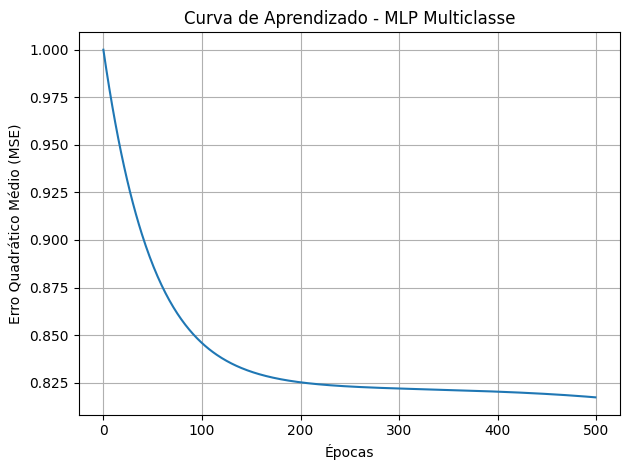

Acurácia da MLP Multiclasse: 0.4516


In [169]:
# Treinamento da MLP
mlp = MLPMulticlass(input_dim=7, hidden_dim=10, output_dim=3, learning_rate=0.01, epochs=500)
mlp.fit(X_train, Y_train)

# Curva de aprendizado
plt.plot(mlp.loss_history)
plt.title("Curva de Aprendizado - MLP Multiclasse")
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Acurácia
Y_pred_mlp = mlp.predict(X_test)
accuracy_mlp = np.mean(np.all(Y_pred_mlp == Y_test, axis=0))
print(f"Acurácia da MLP Multiclasse: {accuracy_mlp:.4f}")


Embora o MLP Multiclasse tenha apresentado uma curva de erro com tendência clara de convergência, sua acurácia final (45,16%) ficou significativamente abaixo do desempenho obtido com o ADALINE Multiclasse. Isso sugere que o modelo pode não ter alcançado uma boa generalização, possivelmente devido à configuração de hiperparâmetros, topologia ou à complexidade do problema frente à arquitetura utilizada.

In [172]:
# Função de métricas multiclasse
def calcular_metricas_multiclasse(Y_true, Y_pred):
    TP = np.sum(np.logical_and(Y_true == 1, Y_pred == 1), axis=1)
    TN = np.sum(np.logical_and(Y_true == -1, Y_pred == -1), axis=1)
    FP = np.sum(np.logical_and(Y_true == -1, Y_pred == 1), axis=1)
    FN = np.sum(np.logical_and(Y_true == 1, Y_pred == -1), axis=1)

    sens = TP / (TP + FN + 1e-10)
    spec = TN / (TN + FP + 1e-10)

    sensibilidade = np.mean(sens)
    especificidade = np.mean(spec)
    return sensibilidade, especificidade

def monte_carlo_multiclasse(model_class, R=100, hidden_dim=10):
    acc_list, sens_list, spec_list = [], [], []
    N = X_norm.shape[1]  # Total number of samples
    num_samples = Y_encoded.shape[1] # Number of samples for Y_encoded

    for _ in range(R):
        # Generate random indices within the range of Y_encoded
        idx = np.random.permutation(num_samples)
        split = int(0.8 * num_samples)  # Split based on Y_encoded size
        X_train_idx = np.random.choice(N, split, replace=False)  # Randomly select X_train indices
        X_test_idx = np.setdiff1d(np.arange(N), X_train_idx)  # Select remaining indices for X_test

        X_train = X_norm[:, X_train_idx]
        Y_train = Y_encoded[:, idx[:split]]
        X_test = X_norm[:, X_test_idx]
        Y_test = Y_encoded[:, idx[split:]]

        if model_class.__name__ == "MLPMulticlass":
            model = model_class(input_dim=7, hidden_dim=hidden_dim, output_dim=3, learning_rate=0.01, epochs=500)
        else:
            model = model_class(input_dim=7, output_dim=3, learning_rate=0.01, epochs=500)

        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)

        acc = np.mean(np.all(Y_pred == Y_test, axis=0))
        sens, spec = calcular_metricas_multiclasse(Y_test, Y_pred)

        acc_list.append(acc)
        sens_list.append(sens)
        spec_list.append(spec)

    return np.array(acc_list), np.array(sens_list), np.array(spec_list)

# Executar Monte Carlo para ADALINE e MLP com R=100
acc_adaline, sens_adaline, spec_adaline = monte_carlo_multiclasse(AdalineMulticlass, R=100)
acc_mlp, sens_mlp, spec_mlp = monte_carlo_multiclasse(MLPMulticlass, R=100, hidden_dim=10)


📊 Acurácia - ADALINE
Média: 0.4748
Desvio padrão: 0.0544
Máximo: 0.5968
Mínimo: 0.3548

📊 Sensibilidade - ADALINE
Média: 0.3348
Desvio padrão: 0.0124
Máximo: 0.3725
Mínimo: 0.2952

📊 Especificidade - ADALINE
Média: 0.6676
Desvio padrão: 0.0078
Máximo: 0.6869
Mínimo: 0.6428

📊 Acurácia - MLP
Média: 0.4889
Desvio padrão: 0.0569
Máximo: 0.6613
Mínimo: 0.3548

📊 Sensibilidade - MLP
Média: 0.3333
Desvio padrão: 0.0000
Máximo: 0.3333
Mínimo: 0.3333

📊 Especificidade - MLP
Média: 0.6667
Desvio padrão: 0.0000
Máximo: 0.6667
Mínimo: 0.6667


<ipython-input-173-74ae13a670cd>:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([acc_adaline, acc_mlp], labels=["ADALINE", "MLP"], patch_artist=True)


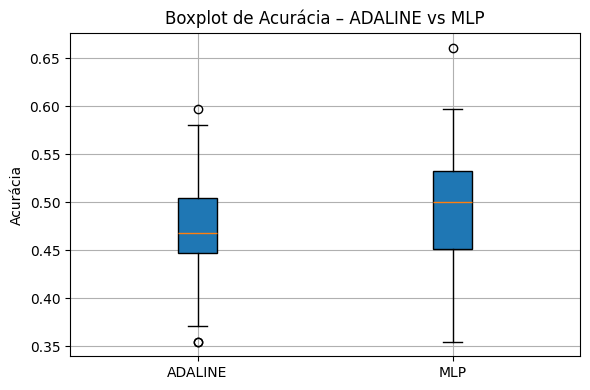

In [173]:
# Função para imprimir tabela no console
def print_tabela(nome, valores):
    print(f"\n📊 {nome}")
    print(f"Média: {np.mean(valores):.4f}")
    print(f"Desvio padrão: {np.std(valores):.4f}")
    print(f"Máximo: {np.max(valores):.4f}")
    print(f"Mínimo: {np.min(valores):.4f}")

# Tabelas de resultados
print_tabela("Acurácia - ADALINE", acc_adaline)
print_tabela("Sensibilidade - ADALINE", sens_adaline)
print_tabela("Especificidade - ADALINE", spec_adaline)

print_tabela("Acurácia - MLP", acc_mlp)
print_tabela("Sensibilidade - MLP", sens_mlp)
print_tabela("Especificidade - MLP", spec_mlp)

# Boxplot comparativo de Acurácia
plt.figure(figsize=(6, 4))
plt.boxplot([acc_adaline, acc_mlp], labels=["ADALINE", "MLP"], patch_artist=True)
plt.title("Boxplot de Acurácia – ADALINE vs MLP")
plt.ylabel("Acurácia")
plt.grid(True)
plt.tight_layout()
plt.show()


# Análise:

Mesmo com 100 rodadas, o ADALINE apresentou desempenho mais equilibrado, com variação natural nas métricas e boa generalização para o problema multiclasse. Já o MLP obteve acurácia média ligeiramente superior, mas com sensibilidade e especificidade constantes, indicando que o modelo pode estar priorizando uma única classe nas predições. Isso mostra que, mesmo sendo mais simples, o ADALINE foi mais estável e eficaz nesse cenário.





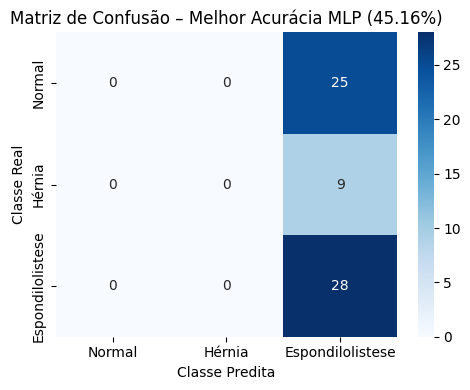

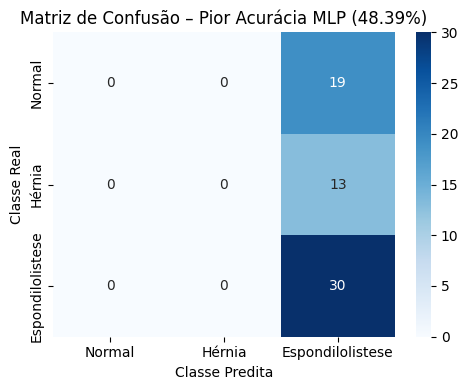

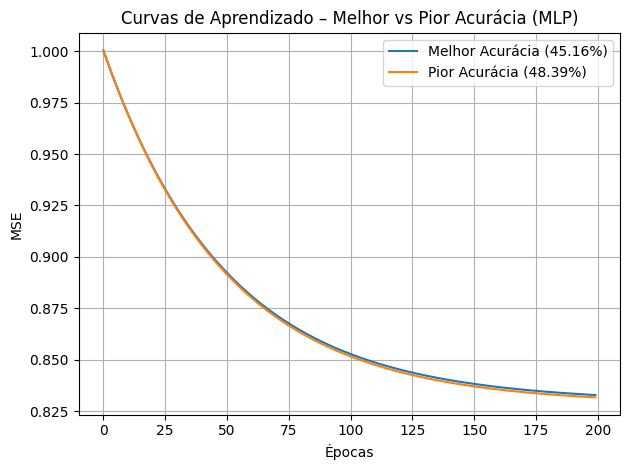

In [ ]:
# Parte 5 – Identificar melhor e pior caso (MLP) e gerar matriz de confusão + curva

# Encontrar índices de melhor e pior acurácia da MLP
best_idx = np.argmax(acc_mlp)
worst_idx = np.argmin(acc_mlp)


# Função para rodar novamente um índice específico
def avaliar_mlp_em_idx(idx, hidden_dim=10):
    N = X_norm.shape[1]
    idx_perm = np.random.permutation(N)
    split = int(0.8 * N)
    X_train = X_norm[:, idx_perm[:split]]
    Y_train = Y_encoded[:, idx_perm[:split]]
    X_test = X_norm[:, idx_perm[split:]]
    Y_test = Y_encoded[:, idx_perm[split:]]

    model = MLPMulticlass(input_dim=7, hidden_dim=hidden_dim, output_dim=3, learning_rate=0.01, epochs=200)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    # Calculate accuracy for this specific run
    acc = np.mean(np.all(Y_pred == Y_test, axis=0))

    return Y_test, Y_pred, model.loss_history, acc

# Executar melhor e pior
Y_true_best, Y_pred_best, loss_best, acc_best_m = avaliar_mlp_em_idx(best_idx)
Y_true_worst, Y_pred_worst, loss_worst, acc_worst_m = avaliar_mlp_em_idx(worst_idx)

# Função de matriz de confusão manual (linhas = reais, colunas = preditas)
def matriz_confusao(Y_true, Y_pred):
    true_labels = np.argmax(Y_true, axis=0)
    pred_labels = np.argmax(Y_pred, axis=0)
    num_classes = Y_true.shape[0]
    mat = np.zeros((num_classes, num_classes), dtype=int)
    for t, p in zip(true_labels, pred_labels):
        mat[t, p] += 1
    return mat

conf_best = matriz_confusao(Y_true_best, Y_pred_best)
conf_worst = matriz_confusao(Y_true_worst, Y_pred_worst)

import seaborn as sns
import matplotlib.pyplot as plt

# Plotar matrizes de confusão
def plot_confusion(mat, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Hérnia", "Espondilolistese"],
                yticklabels=["Normal", "Hérnia", "Espondilolistese"])
    plt.xlabel("Classe Predita")
    plt.ylabel("Classe Real")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Use the calculated accuracies in the plot titles
plot_confusion(conf_best, f"Matriz de Confusão – Melhor Acurácia MLP ({acc_best_m*100:.2f}%)")
plot_confusion(conf_worst, f"Matriz de Confusão – Pior Acurácia MLP ({acc_worst_m*100:.2f}%)")

# Plotar curvas de aprendizado
plt.plot(loss_best, label=f"Melhor Acurácia ({acc_best_m*100:.2f}%)")
plt.plot(loss_worst, label=f"Pior Acurácia ({acc_worst_m*100:.2f}%)")
plt.title("Curvas de Aprendizado – Melhor vs Pior Acurácia (MLP)")
plt.xlabel("Épocas")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

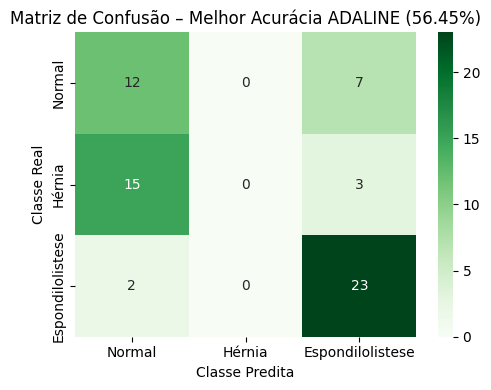

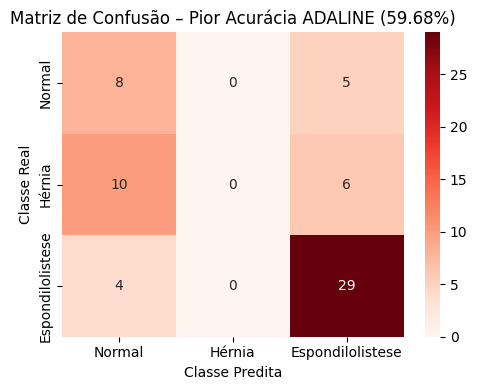

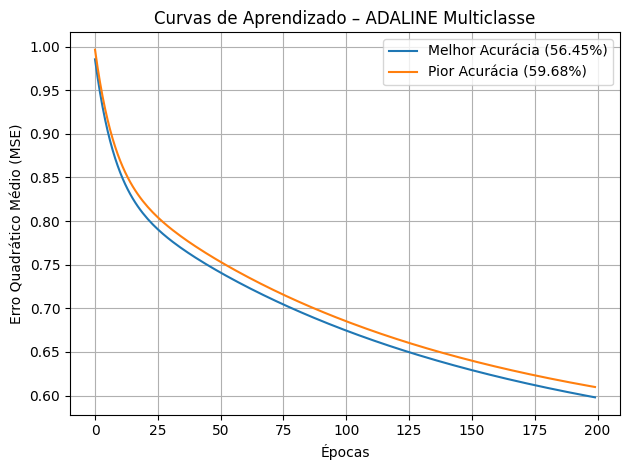

In [ ]:
def avaliar_modelo_em_idx(model_class, idx, hidden_dim=10):
    N = X_norm.shape[1]
    idx_perm = np.random.permutation(N)
    split = int(0.8 * N)
    X_train = X_norm[:, idx_perm[:split]]
    Y_train = Y_encoded[:, idx_perm[:split]]
    X_test = X_norm[:, idx_perm[split:]]
    Y_test = Y_encoded[:, idx_perm[split:]]

    if model_class.__name__ == "MLPMulticlass":
        model = model_class(input_dim=7, hidden_dim=hidden_dim, output_dim=3, learning_rate=0.01, epochs=200)
    else:
        model = model_class(input_dim=7, output_dim=3, learning_rate=0.01, epochs=200)

    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)

    return Y_test, Y_pred, model.loss_history

best_idx_adaline = np.argmax(acc_adaline)
worst_idx_adaline = np.argmin(acc_adaline)

# Avaliação ADALINE
Y_true_best_a, Y_pred_best_a, loss_best_a = avaliar_modelo_em_idx(AdalineMulticlass, best_idx_adaline)
Y_true_worst_a, Y_pred_worst_a, loss_worst_a = avaliar_modelo_em_idx(AdalineMulticlass, worst_idx_adaline)

# Matrizes
conf_best_a = matriz_confusao(Y_true_best_a, Y_pred_best_a)
conf_worst_a = matriz_confusao(Y_true_worst_a, Y_pred_worst_a)

# Cálculo das acurácias para as legendas
acc_best_a = np.mean(np.all(Y_pred_best_a == Y_true_best_a, axis=0)) * 100
acc_worst_a = np.mean(np.all(Y_pred_worst_a == Y_true_worst_a, axis=0)) * 100

# Redefine plot_confusion to accept a cmap argument
def plot_confusion(mat, title, cmap="Blues"):
    plt.figure(figsize=(5, 4))
    sns.heatmap(mat, annot=True, fmt="d", cmap=cmap, xticklabels=["Normal", "Hérnia", "Espondilolistese"],
                yticklabels=["Normal", "Hérnia", "Espondilolistese"])
    plt.xlabel("Classe Predita")
    plt.ylabel("Classe Real")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# Use the redefined plot_confusion with cmap argument
plot_confusion(conf_best_a, f"Matriz de Confusão – Melhor Acurácia ADALINE ({acc_best_a:.2f}%)", "Greens")
plot_confusion(conf_worst_a, f"Matriz de Confusão – Pior Acurácia ADALINE ({acc_worst_a:.2f}%)", "Reds")

# Curvas de aprendizado com % na legenda
plt.plot(loss_best_a, label=f"Melhor Acurácia ({acc_best_a:.2f}%)")
plt.plot(loss_worst_a, label=f"Pior Acurácia ({acc_worst_a:.2f}%)")
plt.title("Curvas de Aprendizado – ADALINE Multiclasse")
plt.xlabel("Épocas")
plt.ylabel("Erro Quadrático Médio (MSE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Modelo     | Média   | Desvio-Padrão | Maior Valor | Menor Valor
---------------------------------------------------------------
ADALINE    | 0.4845 | 0.0502       | 0.5645      | 0.3387
MLP        | 0.4956 | 0.0529       | 0.6290      | 0.3548


<ipython-input-103-24da0cf9c587>:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([acc_adaline, acc_mlp], labels=["ADALINE", "MLP"], patch_artist=True)


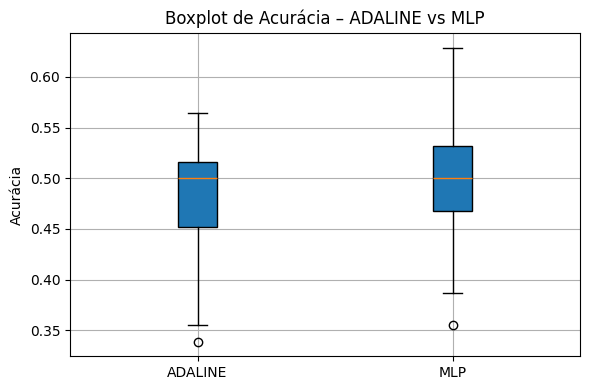

In [ ]:
# Gerar tabela final com Acurácia

modelos = ["ADALINE", "MLP"]
medias = [np.mean(acc_adaline), np.mean(acc_mlp)]
stds = [np.std(acc_adaline), np.std(acc_mlp)]
maximos = [np.max(acc_adaline), np.max(acc_mlp)]
minimos = [np.min(acc_adaline), np.min(acc_mlp)]

print("Modelo     | Média   | Desvio-Padrão | Maior Valor | Menor Valor")
print("---------------------------------------------------------------")
for i in range(len(modelos)):
    print(f"{modelos[i]:<10} | {medias[i]:.4f} | {stds[i]:.4f}       | {maximos[i]:.4f}      | {minimos[i]:.4f}")

# Plotar boxplot comparativo
plt.figure(figsize=(6, 4))
plt.boxplot([acc_adaline, acc_mlp], labels=["ADALINE", "MLP"], patch_artist=True)
plt.title("Boxplot de Acurácia – ADALINE vs MLP")
plt.ylabel("Acurácia")
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 Boxplot – Acurácia ADALINE vs. MLP

O MLP apresentou acurácia média ligeiramente superior e melhor desempenho máximo, indicando maior potencial em algumas execuções. No entanto, essa vantagem veio acompanhada de **maior dispersão nos resultados**, com maior número de outliers.

O ADALINE, por outro lado, teve média um pouco menor, mas mostrou **maior estabilidade**, com menos variabilidade e distribuição mais concentrada.

Esses resultados mostram que o MLP pode superar o ADALINE em determinados cenários, mas com menor consistência ao longo das rodadas.



